User Id to name

In [1]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [2]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
# For example, the tuple (0, 1) indicates that the data scientist with id 0
# (Hero) and the data scientist with id 1 (Dunn) are friends.

In [4]:
# let’s create a dict where the keys are user ids and the values are
# lists of friend ids.

# for every user, assign an empty list first
friendships = {user['id']:[] for user in users}

In [5]:
# loop in friendship_pairs and fill the list
for friend1, friend2 in friendship_pairs:
    friendships[friend1].append(friend2)
    # I'm also a friend to my friend
    friendships[friend2].append(friend1)

In [6]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

What’s the average number of connections?
- First we will need to find the number of connections for each user

In [7]:
def no_connections(user):
    return len(friendships[user])

In [8]:
total_connections = sum(no_connections(user) for user in friendships.keys())
print(total_connections)

24


In [10]:
average_connections = total_connections/len(friendships.keys())
print(average_connections)

2.4


It’s also easy to find the most connected people—they’re the people who
have the largest numbers of friends.
Since there aren’t very many users, we can simply sort them from “most
friends” to “least friends”:

list of pairs with (id,num_of_connections)

In [13]:
id_to_nConnections = [(id,len(friendships[id])) for id in friendships.keys()]
print(id_to_nConnections)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [16]:
id_to_nConnections.sort(key=lambda x:x[1],reverse=True)
# lambda x:x[1] -> for every x (1,3), take first position - 3 here
print(id_to_nConnections)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


# Data Scientists You may know
we'll try to know the number of possible connections for each Data Scientist in users
- More like, I know a guy who knows a guy, so friend of a friend is also a connection for me

In [48]:
def foaf(user): #user will be user id directly
    result = list()
    for connection1 in friendships[user]:
        for connection2 in friendships[connection1]:
            result.append(connection2)
    return result
print(foaf(0))

[0, 2, 3, 0, 1, 3]


In [49]:
from collections import Counter

def friends_of_friends(user):
    foaf_counter = Counter()
    
    for connection1 in friendships[user]:
        for connection2 in friendships[connection1]:
            if connection2 != user and connection2 not in friendships[user]:
                foaf_counter[connection2] += 1

    return foaf_counter


In [52]:
print(friends_of_friends(3)) 

Counter({0: 2, 5: 1})


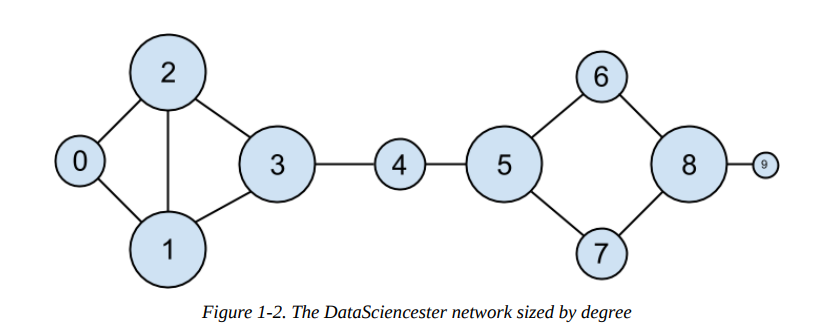

As per the image above, 3 was connected to 0(foaf for 3) had 2 mutual connections(1,2) and 5(foaf for 3) had single mutual connection(4)

As a data scientist, you know that you also might enjoy meeting users with
similar interests. (This is a good example of the “substantive expertise”
aspect of data science.) After asking around, you manage to get your hands
on this data, as a list of pairs (user_id, interest)

In [53]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

For example, Hero (id 0) has no friends in common with Klein (id 9), but
they share interests

Let's create two dictionaries, that will map, 
1. user_id to interest
2. interest to user_ids

In [55]:
from collections import defaultdict
id_to_interest = defaultdict(list)
for id, interest in interests:
    id_to_interest[id].append(interest)

interest_to_id = defaultdict(list)
for id, interest in interests:
    id_to_interest[interest].append(id)



In [58]:
def most_common_interest_with(user):
    common_interests_counter = Counter()
    for interest in id_to_interest[user]:
        for user_with_interest in interest_to_id[interest]:
            if user_with_interest != user:
                common_interests_counter[user_with_interest] += 1
    return common_interests_counter

you've been provided with a dataset containing each user’s salary (in dollars) and tenure as a data
scientist (in years):

In [74]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [78]:
tenure_to_salary = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    tenure_to_salary[tenure].append(salary)

In [79]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


In [80]:
tenure_bucket_to_salary = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    tenure_bucket_to_salary[bucket].append(salary)

In [81]:
avg_salary_by_bucket = {
    tenure_bucket : sum(salaries)/len(salaries)
    for tenure_bucket,salaries in tenure_bucket_to_salary.items()
}

In [85]:
print(avg_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}
